# Tilbud og etterspørsel 2

### importerer nødvendige pakker:

In [2]:
import sympy as sp
from sympy.solvers import solve
import numpy as np
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sympy'

### Definerer tilbud og etterspørsel

In [11]:
def supply(p):
    return p**2
    
def demand(p):
    return 125/(5+p)

### Tegner funksjonene

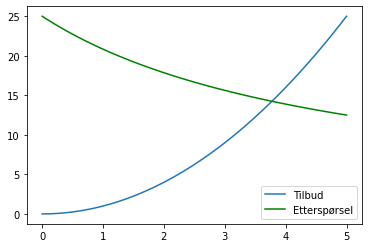

In [12]:
p = np.linspace(0,5,100)
_=plt.plot(p,supply(p),label='Tilbud')
_=plt.plot(p,demand(p),color='green',label='Etterspørsel')
_=plt.legend()

### Løser for solgt mengde og pris

In [13]:
x,y,z=sp.symbols('x y z')
quantity=solve(demand(x)-supply(x),x)[2]
price=demand(quantity)

### Finner verdiskapning, konsument- og produsentoverskudd

In [14]:
#using analytical price is too computationally demanding:
approx_price=np.round(float(price),4)

#Calculating surpluses:
welfare_surpluss=sp.integrate(demand(x)-supply(x),(x,0,quantity))
consumer_surpluss=sp.integrate(demand(x)-approx_price,(x,0,quantity))
producer_surpluss=sp.integrate(approx_price-supply(x),(x,0,quantity))

### Lager tabell med resultatene

In [15]:
tbl=f"""
|                     | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------| :----------------------------------------| :-----------------------------| 
| Solgt mengde:       | ${np.round(float(quantity),1)}$          |${sp.latex(quantity)}$         | 
| Pris:               | ${approx_price}$                         |${sp.latex(price)}$            | 
| Verdiskapning:      | ${np.round(float(welfare_surpluss),1)}$  |${sp.latex(welfare_surpluss)}$ | 
| Konsumentoverskudd: | ${np.round(float(consumer_surpluss),1)}$ | | 
| Produsentoverskudd: | ${np.round(float(producer_surpluss),1)}$ | | 
"""
display(Markdown(tbl))


|                     | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------| :----------------------------------------| :-----------------------------| 
| Solgt mengde:       | $3.8$          |$- \frac{5}{3} + \frac{5}{9 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}}} + 5 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}}$         | 
| Pris:               | $14.246$                         |$\frac{125}{\frac{5}{9 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}}} + \frac{10}{3} + 5 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}}}$            | 
| Verdiskapning:      | $52.4$  |$- 125 \log{\left(5 \right)} - \frac{\left(- \frac{5}{3} + \frac{5}{9 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}}} + 5 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}}\right)^{3}}{3} + 125 \log{\left(\frac{5}{9 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}}} + \frac{10}{3} + 5 \sqrt[3]{\frac{\sqrt{69}}{18} + \frac{25}{54}} \right)}$ | 
| Konsumentoverskudd: | $16.5$ | | 
| Produsentoverskudd: | $35.8$ | | 


### Lager figur med resultatene

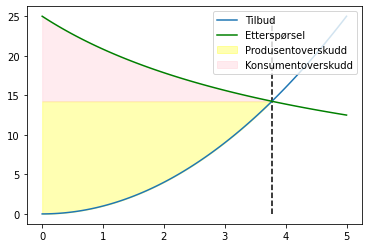

In [16]:
q = np.linspace(0,5,100)
_=plt.plot(p,supply(p),label='Tilbud')
_=plt.plot(p,demand(p),color='green',label='Etterspørsel')
q = np.linspace(0,float(quantity),100)
_=plt.fill_between(q, supply(q),approx_price, color = "yellow",alpha = 0.3,label='Produsentoverskudd')
_=plt.fill_between(q,approx_price,demand(q), color = "pink",alpha = 0.3,label='Konsumentoverskudd')
_=plt.vlines(float(quantity), 0, 25,colors=['black'],linestyles='dashed')
_=plt.legend(loc='upper right')

In [17]:
quantity

-5/3 + 5/(9*(sqrt(69)/18 + 25/54)**(1/3)) + 5*(sqrt(69)/18 + 25/54)**(1/3)

In [18]:
float(quantity)

3.774388331233464